In [20]:
# 라이브러리 모음
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.graph_objects as go
import plotly.express as px

# 모듈 모음
import modules as mds

# Windows에서 한글 폰트 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'이 설치되어 있을 경우
# plt.rcParams['axes.unicode_minus'] = False     # 마이너스(-) 부호 깨짐 방지

# macOS에서 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'   # macOS 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False

In [14]:
# 누적 설비용량 데이터 정리

# 누적 / 연도별 데이터 불러오기
data_total = pd.read_excel("dataset/지역별_누적_설비용량.xlsx")
data_2024 = pd.read_excel("dataset/2024년도_신규_설비용량.xlsx")
data_2023 = pd.read_excel("dataset/2023년도_신규_설비용량.xlsx")
data_2022 = pd.read_excel("dataset/2022년도_신규_설비용량.xlsx")
data_2021 = pd.read_excel("dataset/2021년도_신규_설비용량.xlsx")

# 데이터프레임으로 변환
# ic = Installed Capacity = 설비용량
ic_total = pd.DataFrame(data_total)
ic_2024 = pd.DataFrame(data_2024)
ic_2023 = pd.DataFrame(data_2023)
ic_2022 = pd.DataFrame(data_2022)
ic_2021 = pd.DataFrame(data_2021)

# 숫자의 ',' 때문에 object 값이었던 데이터들을 int 값으로 변환
mds.delete_comma(ic_total)
mds.delete_comma(ic_2024)
mds.delete_comma(ic_2023)
mds.delete_comma(ic_2022)
mds.delete_comma(ic_2021)

# 컴럼 통일화를 위해 capacity_total에 "합계" 컬럼 추가
ic_total["합계"] = ic_total.sum(axis=1, numeric_only=True)

# 하나의 DataFrame으로 병합
ic_total = pd.concat([ic_total, ic_2024, ic_2023, ic_2022, ic_2021], ignore_index=True)

# 각 연도별 누적값 계산
for i in range(1, len(ic_total)):
    ic_total.iloc[i, 1:] = ic_total.iloc[i-1, 1:] - ic_total.iloc[i, 1:]

# 연도 정리
ic_total.rename(columns={"Unnamed: 0": "연도"}, inplace=True)
ic_total["연도"] = [2024, 2023, 2022, 2021, 2020]

# 오름차순 정렬 (주석 처리 시 내림차순)
# ic_total.sort_values(by="연도", inplace=True)
# ic_total.reset_index(drop=True, inplace=True)

# 2020~2024 각 연도의 지역별 누적 설비용량
ic_total.head()

# ic_total.to_excel("dataset/지역별_연도별_설비용량.xlsx", index=False, engine="openpyxl")


,연도,서울,부산,대구,인천,광주,대전,울산,세종,경기,충북,충남,전남,경북,경남,제주,강원,전북,합계
0,2024,50,275,420,163,353,65,152,88,2012,1613,3772,6023,3842,2016,621,1943,4590,27998
1,2023,50,234,339,139,303,55,122,78,1672,1408,3072,5410,3324,1745,610,1760,4304,24625
2,2022,48,202,297,124,274,50,99,70,1459,1240,2798,4568,2886,1564,587,1612,3995,21873
3,2021,44,170,265,110,249,46,87,62,1278,1065,2522,3911,2409,1347,549,1408,3357,18879
4,2020,41,144,200,100,215,39,69,55,1056,846,2038,3054,1771,1085,425,1105,2559,14802


In [15]:
# 누적 발전량 데이터 정리

# 누적 / 연도별 데이터 불러오기
data_total_2022 = pd.read_excel("dataset/지역별_누적_발전량.xlsx")
data_2024 = pd.read_excel("dataset/2024년_신규_발전량.xlsx")
data_2023 = pd.read_excel("dataset/2023년_신규_발전량.xlsx")
data_2022 = pd.read_excel("dataset/2022년_신규_발전량.xlsx")
data_2021 = pd.read_excel("dataset/2021년_신규_발전량.xlsx")
data_2020 = pd.read_excel("dataset/2020년_신규_발전량.xlsx")

# 데이터프레임으로 변환
# gen = Power Generation = 발전량
gen_total_2022 = pd.DataFrame(data_total_2022)
gen_2024 = pd.DataFrame(data_2024)
gen_2023 = pd.DataFrame(data_2023)
gen_2022 = pd.DataFrame(data_2022)
gen_2021 = pd.DataFrame(data_2021)
gen_2020 = pd.DataFrame(data_2020)

# 열과 행 전치
gen_2024 = gen_2024.T.reset_index(drop=True)
gen_2023 = gen_2023.T.reset_index(drop=True)
gen_2022 = gen_2022.T.reset_index(drop=True)
gen_2021 = gen_2021.T.reset_index(drop=True)
gen_2020 = gen_2020.T.reset_index(drop=True)

# 컴럼 정리
gen_2024.columns = gen_2024.iloc[0]
gen_2024.drop(labels=gen_2024.index[0], axis=0, inplace=True)
gen_2023.columns = gen_2023.iloc[0]
gen_2023.drop(labels=gen_2023.index[0], axis=0, inplace=True)
gen_2022.columns = gen_2022.iloc[0]
gen_2022.drop(labels=gen_2022.index[0], axis=0, inplace=True)
gen_2021.columns = gen_2021.iloc[0]
gen_2021.drop(labels=gen_2021.index[0], axis=0, inplace=True)
gen_2020.columns = gen_2020.iloc[0]
gen_2020.drop(labels=gen_2020.index[0], axis=0, inplace=True)


# 연도 컬럼 추가
gen_2024.insert(0, "연도", np.nan)
gen_2023.insert(0, "연도", np.nan)
gen_2022.insert(0, "연도", np.nan)
gen_2021.insert(0, "연도", np.nan)
gen_2020.insert(0, "연도", np.nan)

# 숫자의 ',' 때문에 object 값이었던 데이터들을 int 값으로 변환
mds.delete_comma(gen_total_2022)
mds.delete_comma(gen_2024)
mds.delete_comma(gen_2023)
mds.delete_comma(gen_2022)
mds.delete_comma(gen_2021)
mds.delete_comma(gen_2020)

# 월별 데이터 연도별 데이터로 변환
gen_2024 = pd.DataFrame(gen_2024.sum()).T
gen_2023 = pd.DataFrame(gen_2023.sum()).T
gen_2022 = pd.DataFrame(gen_2022.sum()).T
gen_2021 = pd.DataFrame(gen_2021.sum()).T
gen_2020 = pd.DataFrame(gen_2020.sum()).T

# "합계" 컬럼 추가
gen_2024["합계"] = gen_2024.sum(axis=1, numeric_only=True)
gen_2023["합계"] = gen_2023.sum(axis=1, numeric_only=True)
gen_2022["합계"] = gen_2022.sum(axis=1, numeric_only=True)
gen_2021["합계"] = gen_2021.sum(axis=1, numeric_only=True)
gen_2020["합계"] = gen_2020.sum(axis=1, numeric_only=True)

# # 하나의 DataFrame으로 병합
gen_total = pd.concat([gen_2024, gen_2023, gen_total_2022, gen_2022, gen_2021], ignore_index=True)

# 연도 정리
gen_total = gen_total.drop(gen_total.columns[-1], axis=1)
gen_total.rename(columns={"지역": "연도"}, inplace=True)
gen_total["연도"] = [2024, 2023, 2022, 2021, 2020]

# 소수점 제거
gen_total = gen_total.astype(int)

# # 각 연도별 누적값 계산
gen_total.iloc[1, 1:] = gen_total.iloc[2, 1:] + gen_total.iloc[1, 1:] # 2023 계산
gen_total.iloc[0, 1:] = gen_total.iloc[1, 1:] + gen_total.iloc[0, 1:] # 2024 계산
gen_total.iloc[3, 1:] = gen_total.iloc[2, 1:] - gen_total.iloc[3, 1:] # 2021 계산
gen_total.iloc[4, 1:] = gen_total.iloc[3, 1:] - gen_total.iloc[4, 1:] # 2020 계산


# # 오름차순 정렬 (주석 처리 시 내림차순)
# # gen_total.sort_values(by="연도", inplace=True)
# # gen_total.reset_index(drop=True, inplace=True)

gen_total.to_excel("dataset/지역별_연도별_발전량.xlsx", index=False, engine="openpyxl")

# # 2020~2024 각 연도의 지역별 누적 발전량
gen_total.head()

,연도,서울,부산,대구,인천,광주,대전,울산,세종,경기,충북,충남,전남,경북,경남,제주,강원,전북,합계
0,2024,454992,1584748,1962317,910178,2054262,372182,653470,524858,9209968,8280679,20170041,34738869,19298394,10914932,3712238,11167641,28815406,154825183
1,2023,397620,1296806,1518891,747103,1694113,305236,503506,437543,7143971,6533179,15870905,27619683,14957803,8711121,3077732,8984358,23235897,123035475
2,2022,341328,1056914,1166405,614164,1386507,249449,388527,358492,5478859,4990438,12385263,21236718,11154610,6771133,2429222,6964022,17956708,94928767
3,2021,284628,854401,851754,489619,1087788,196895,282818,287876,4001713,3603271,9087437,15534479,7826973,4971554,1763312,5086129,12875255,69085910
4,2020,232973,687334,598182,375544,837087,155021,195240,224741,2768139,2462795,6310846,10918067,5318784,3562221,1189794,3488999,9022902,48348677


In [16]:
# 연도별 누적 발전량 평균 성장 데이터 재구성

# 연도별 모든 지역의 평균값 계산 후 새로운 df 생성
area_col = gen_total.columns[1:-1]
year_mean = gen_total[area_col].mean(axis=1).round().astype(int)
year_mean_df = pd.DataFrame({"연도": gen_total["연도"], "평균 발전량(MWh)": year_mean})

year_mean_df

,연도,평균 발전량(MWh)
0,2024,9107363
1,2023,7237380
2,2022,5584045
3,2021,4063877
4,2020,2844039


In [17]:
# 연도별 누적 발전량 평균 성장 데이터 그래프 제작

year_mean_fig = px.bar(x=year_mean_df["연도"], y=year_mean_df["평균 발전량(MWh)"])

# 크기 설정
year_mean_fig.update_layout(width=1200,height=800)

# 타이틀 설정
year_mean_fig.update_layout(title_text="연도별 평균 태양광 발전량(MWh)")
year_mean_fig.update_layout(
                title_x = 0.5,
                title_y = 0.96,
                title_xanchor = "center",
                title_yanchor = "middle")
year_mean_fig.update_layout(
        title_font_size = 25,
        title_font_color = "black"
        )

# x, y축 이름 설정
year_mean_fig.update_xaxes(title_text='연도')
year_mean_fig.update_yaxes(title_text='평균 발전량(MWh)')

year_mean_fig.show()

In [8]:
# 연도별 신규 발전량 평균 성장 데이터 재구성

# 하나의 DataFrame으로 병합
gen_new_total = pd.concat([gen_2024, gen_2023, gen_2022, gen_2021, gen_2020], ignore_index=True).astype(int)
gen_new_total["연도"] = [2024, 2023, 2022, 2021, 2020]

# 연도별 모든 지역의 평균값 계산 후 새로운 df 생성
area_new_col = gen_new_total.columns[1:-1]
year_new_mean = gen_new_total[area_new_col].mean(axis=1).round().astype(int)
year_new_mean_df = pd.DataFrame({"연도": gen_new_total["연도"], "평균 발전량(MWh)": year_new_mean})

gen_new_total

gen_new_total.to_excel("dataset/지역별_연도별_신규_발전량.xlsx", index=False, engine="openpyxl")

In [ ]:
# 연도별 신규 발전량 평균 성장 데이터 그래프 제작

year_new_mean_fig = px.bar(x=year_new_mean_df["연도"], y=year_new_mean_df["평균 발전량(MWh)"])

# 크기 설정
year_new_mean_fig.update_layout(width=1200,height=800)

# 타이틀 설정
year_new_mean_fig.update_layout(title_text="연도별 태양광 발전량 성장치")
year_new_mean_fig.update_layout(
                title_x = 0.5,
                title_y = 0.96,
                title_xanchor = "center",
                title_yanchor = "middle")
year_new_mean_fig.update_layout(
        title_font_size = 25,
        title_font_color = "black"
        )

# x, y축 이름 설정
year_new_mean_fig.update_xaxes(title_text='연도')
year_new_mean_fig.update_yaxes(title_text='평균 발전량(MWh)')

year_new_mean_fig.show()
year_new_mean_df["연도"]

In [6]:
# 2024 지역별 발전량 데이터 재구성

area_2024_df = pd.DataFrame({"지역": gen_total.columns[1:-1], "발전량(MWh)": gen_total.iloc[0, 1:-1]}).reset_index(drop=True)
area_2024_df = area_2024_df.sort_values("발전량(MWh)")
area_2024_df

,지역,발전량(MWh)
5,대전,372182
0,서울,454992
7,세종,524858
6,울산,653470
3,인천,910178
1,부산,1584748
2,대구,1962317
4,광주,2054262
14,제주,3712238
9,충북,8280679


In [7]:
# 2024 지역별 발전량 데이터 그래프 제작

area_2024_fig = px.bar(x=area_2024_df["지역"], y=area_2024_df["발전량(MWh)"])

# 크기 설정
area_2024_fig.update_layout(width=1200,height=800)

# 타이틀 설정
area_2024_fig.update_layout(title_text="2024년도 지역별 태양광 발전량")
area_2024_fig.update_layout(
                title_x = 0.5,
                title_y = 0.96,
                title_xanchor = "center",
                title_yanchor = "middle")
area_2024_fig.update_layout(
        title_font_size = 25,
        title_font_color = "black"
        )

# x, y축 이름 설정
area_2024_fig.update_xaxes(title_text='지역')
area_2024_fig.update_yaxes(title_text='발전량(MWh)')

area_2024_fig.show()

In [5]:
# 엑셀 불러오기
capacity = pd.read_excel("dataset/지역별_연도별_설비용량.xlsx")
generation = pd.read_excel("dataset/지역별_연도별_발전량.xlsx")

# 설비용량 long 변환 (합계 제외)
cap_long = capacity.drop(columns=["합계"]).melt(
    id_vars=["연도"], var_name="지역", value_name="설비용량(MW)"
)

# 발전량 long 변환 (합계 제외)
gen_long = gen_new_total.drop(columns=["합계"]).melt(
    id_vars=["연도"], var_name="지역", value_name="발전량(MWh)"
)

# 데이터 합치기
merged = pd.merge(cap_long, gen_long, on=["연도", "지역"])

# 설비 이용률 계산
merged["설비이용률(%)"] = merged["발전량(MWh)"] / (merged["설비용량(MW)"] * 8760) * 100

# 연도 기준 내림차순 (2024 → 2020)
merged_sorted = merged.sort_values(by="연도", ascending=False)

# 인덱스 초기화
merged_sorted = merged_sorted.reset_index(drop=True)

print(merged_sorted.head(20))  # 상위 20개 확인

      연도  지역  설비용량(MW)  발전량(MWh)   설비이용률(%)
0   2024  서울        50     57372  13.098630
1   2024  인천       163    163075  11.420778
2   2024  광주       353    360149  11.646714
3   2024  대구       420    443426  12.052240
4   2024  부산       275    287942  11.952760
5   2024  전남      6023   7119186  13.493151
6   2024  경북      3842   4340591  12.896961
7   2024  충남      3772   4299136  13.010842
8   2024  충북      1613   1747500  12.367409
9   2024  강원      1943   2183283  12.827237
10  2024  전북      4590   5579509  13.876476
11  2024  경남      2016   2203811  12.478998
12  2024  제주       621    634506  11.663799
13  2024  경기      2012   2065997  11.721889
14  2024  세종        88     87315  11.326666
15  2024  울산       152    149964  11.262617
16  2024  대전        65     66946  11.757288
17  2023  대구       339    352486  11.869654
18  2023  인천       139    132939  10.917759
19  2023  부산       234    239892  11.702962


In [11]:
# 0) 합친 데이터프레임: merged (컬럼: 연도, 지역, 설비용량(MW), 발전량(MWh), 설비이용률(%))

# 1) 2024년만 필터링 + 안전 전처리
df = merged[merged["연도"] == 2024].copy()

# 숫자형 강제(혹시 문자열/콤마가 섞여 있을 수 있으므로)
for col in ["설비용량(MW)", "발전량(MWh)", "설비이용률(%)"]:
    df[col] = (
        df[col].astype(str).str.replace(",", "", regex=False).str.strip()
        .replace({"": np.nan, "-": np.nan})
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 0 또는 NaN 제거 (분모/분자 문제 방지)
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["설비용량(MW)", "발전량(MWh)"])
df = df[df["설비용량(MW)"] > 0]

# 2) 설비이용률이 비어 있으면 재계산 (있으면 그대로 사용)
if df["설비이용률(%)"].isna().any():
    df.loc[df["설비이용률(%)"].isna(), "설비이용률(%)"] = (
        df["발전량(MWh)"] / (df["설비용량(MW)"] * 8760) * 100
    )

# 3) 평균선/라벨 등 보조 계산
mean_cap = df["설비용량(MW)"].mean()
mean_cf  = df["설비이용률(%)"].mean()

# 좌상(효율↑, 용량↓) = 투자유망 가이드 마스크
mask_opportunity = (df["설비이용률(%)"] >= mean_cf) & (df["설비용량(MW)"] < mean_cap)

# 버블 크기(발전량 면적 비례, sqrt 스케일)
mwh = df["발전량(MWh)"].clip(lower=0)
size_px = (np.sqrt(mwh / mwh.max()) * 60) + 12   # 필요 시 60/12 조정

# 4) Plotly 버블차트
xmin, xmax = float(df["설비용량(MW)"].min()), float(df["설비용량(MW)"].max())
ymin, ymax = float(df["설비이용률(%)"].min()), float(df["설비이용률(%)"].max())

fig = go.Figure()

# 버블
fig.add_trace(go.Scatter(
    x=df["설비용량(MW)"],
    y=df["설비이용률(%)"],
    mode="markers",
    marker=dict(
        size=size_px,
        color=df["설비이용률(%)"],      # 색상 = 이용률
        colorscale="Viridis",
        colorbar=dict(title="설비이용률 (%)"),
        line=dict(color="white", width=0.8),
        opacity=0.7,
        sizemode="diameter",
    ),
    text=df["지역"],
    hovertemplate=(
        "<b>%{text}</b><br>" +
        "설비용량: %{x:.0f} MW<br>" +
        "설비이용률: %{y:.2f} %<br>" +
        "발전량: %{customdata:,} MWh<extra></extra>"
    ),
    customdata=np.array(df["발전량(MWh)"]),
    name="지역"
))

# 평균선
fig.add_hline(y=float(mean_cf),  line_dash="dash", annotation_text="평균 이용률",   annotation_position="top left")
fig.add_vline(x=float(mean_cap), line_dash="dash", annotation_text="평균 설비용량", annotation_position="top left")

# === 2사분면 강조: 배경 영역 채우기 ===
fig.add_shape(
    type="rect",
    x0=xmin, x1=float(mean_cap),     # 용량 < 평균 (좌측)
    y0=float(mean_cf), y1=ymax,      # 이용률 ≥ 평균 (상단)
    fillcolor="lightgreen",
    opacity=0.18,
    line_width=0,
    layer="below"    # 버블 뒤에 깔기
)

# 보조 라벨
fig.add_annotation(
    x=(xmin + mean_cap)/2,
    y=(mean_cf + ymax)/2,
    text="투자유망 영역 (2사분면)",
    showarrow=False,
    font=dict(size=12),
    align="center"
)

# === 2사분면 버블 재추가(강조) ===
if mask_opportunity.any():
    fig.add_trace(go.Scatter(
        x=df.loc[mask_opportunity, "설비용량(MW)"],
        y=df.loc[mask_opportunity, "설비이용률(%)"],
        mode="markers+text",
        marker=dict(
            size=size_px[mask_opportunity],   # 기존 크기 유지
            color="crimson",                  # 강조 색
            line=dict(color="black", width=2),
            opacity=0.95,
            sizemode="diameter",
        ),
        text=df.loc[mask_opportunity, "지역"],
        textposition="top center",
        name="투자유망 지역 (2사분면)",
        hovertemplate=(
            "<b>%{text}</b><br>" +
            "설비용량: %{x:.0f} MW<br>" +
            "설비이용률: %{y:.2f} %<extra></extra>"
        ),
        showlegend=True
    ))

# (선택) 범례 순서 정리
fig.update_layout(
    legend=dict(
        traceorder="reversed"
    )
)

# 좌상 사분면(투자유망) 라벨
for _, r in df[mask_opportunity].iterrows():
    fig.add_annotation(
        x=float(r["설비용량(MW)"]), y=float(r["설비이용률(%)"]),
        text=str(r["지역"]), showarrow=False, font=dict(size=11)
    )

# 사분면 가이드 텍스트
dx, dy = xmax - xmin, ymax - ymin
fig.add_annotation(x=xmin + dx*0.01, y=mean_cf + dy*0.02, text="좌상: 효율↑·용량↓ → 투자유망", showarrow=False, font=dict(size=10), xanchor="left")
fig.add_annotation(x=xmin + dx*0.01, y=ymin + dy*0.02, text="좌하: 효율↓·용량↓", showarrow=False, font=dict(size=10), xanchor="left")
fig.add_annotation(x=mean_cap + dx*0.01, y=mean_cf + dy*0.02, text="우상: 효율↑·용량↑", showarrow=False, font=dict(size=10), xanchor="left")
fig.add_annotation(x=mean_cap + dx*0.01, y=ymin + dy*0.02, text="우하: 효율↓·용량↑", showarrow=False, font=dict(size=10), xanchor="left")

fig.update_layout(
    title="지역별 설비이용률 버블 차트 (2024, 합친 데이터 사용)",
    xaxis_title="설비용량 (MW)",
    yaxis_title="설비이용률 (%)",
    template="plotly_white",
    hovermode="closest",
)

fig.show()

In [ ]:
# 데이터 불러오기
df = pd.read_csv("")
df = pd.read_excel("")

# 연도별 전국 평균 설비 이용률 추세
plt.figure(figsize=()) # widths, height 설정
yearly_avg = df.groupby("연도")["설비이용률(%)"].mean().reset_index()
sns.lineplot(data=yearly_avg, x="연도", y="설비이용률(%)", marker="o")
plt.title("연도별 전국 평균 설비 이용률 추세", fontsize=14)
plt.ylabel("설비 이용률 (%)")
plt.grid(True, alpha=0.3)
plt.show()

# 지역별 설비 이용률 순위(평균)
plt.figure(figsize=()) # widths, height 살정
region_avg = df.groupby("지역")["설비이용률(%)"].mean().reset_index()
sns.barplot(data=region_avg.sort_values("설비이용률(%)", ascending=False),
            x="설비이용률(%)", y="지역")
plt.title("지역별 평균 설비 이용률 순위", fontsize=14)
plt.xlabel("평균 설비 이용률 (%)")
plt.show()

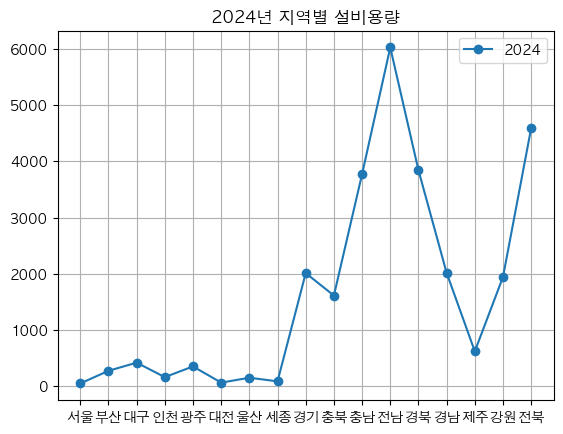

In [21]:
# 연도별 각 지역 설비용량 선 그래프 만들기
I_C_by_region_by_year= pd.read_excel('dataset/지역별_연도별_설비용량.xlsx')
x = I_C_by_region_by_year.columns[1:18]
y = I_C_by_region_by_year.iloc[0,1:18]
plt.plot(x,y,marker = 'o', label = "2024")
plt.title('2024년 지역별 설비용량')
plt.legend()
plt.grid()
plt.show()